In [13]:
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option("display.max_columns", None)

In [14]:
dftrain = pd.read_csv("../train.csv")

In [15]:
def eda(dataframe):
    temp_maxrows = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", None)
    print("missing values \n", dataframe.isnull().sum())
    print("dataframe index \n", dataframe.index)
    print("dataframe types \n", dataframe.dtypes)
    print("dataframe shape \n", dataframe.shape)
    print("dataframe describe \n", dataframe.describe())
    print("dataframe duplicates \n", dataframe.duplicated().sum()) 
    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())
    pd.set_option("display.max_rows", temp_maxrows)
        
eda(dftrain)

missing values 
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF       

In [16]:
def eda_helper(df):
    temp_maxrows = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", None)
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        dict_.update({"null_count" : data.isnull().sum()})
        dict_.update({"unique_count" : len(data.unique())})
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df
    pd.set_option("display.max_rows", temp_maxrows)

eda_helper(dftrain)

null_count  unique_count     data_type
Id                      0          1460         {int}
LotArea                 0          1073         {int}
GrLivArea               0           861         {int}
BsmtUnfSF               0           780         {int}
1stFlrSF                0           753         {int}
TotalBsmtSF             0           721         {int}
SalePrice               0           663         {int}
BsmtFinSF1              0           637         {int}
GarageArea              0           441         {int}
2ndFlrSF                0           417         {int}
WoodDeckSF              0           274         {int}
OpenPorchSF             0           202         {int}
BsmtFinSF2              0           144         {int}
EnclosedPorch           0           120         {int}
YearBuilt               0           112         {int}
ScreenPorch             0            76         {int}
YearRemodAdd            0            61         {int}
Neighborhood            0            25         {str}
LowQualFinSF            0            24         {int}
MiscVal                 0            21         {int}
3SsnPorch               0            20         {int}
Exterior2nd             0            16         {str}
MSSubClass              0            15         {int}
Exterior1st             0            15         {str}
TotRmsAbvGrd            0            12         {int}
MoSold                  0            12         {int}
OverallQual             0            10         {int}
Condition1              0             9         {str}
OverallCond             0             9         {int}
SaleType                0             9         {str}
Condition2              0             8         {str}
HouseStyle              0             8         {str}
RoofMatl                0             8         {str}
BedroomAbvGr            0             8         {int}
PoolArea                0             8         {int}
Functional              0             7         {str}
RoofStyle               0             6         {str}
Foundation              0             6         {str}
Heating                 0             6         {str}
SaleCondition           0             6         {str}
MSZoning                0             5         {str}
LotConfig               0             5         {str}
BldgType                0             5         {str}
ExterCond               0             5         {str}
HeatingQC               0             5         {str}
GarageCars              0             5         {int}
YrSold                  0             5         {int}
LotShape                0             4         {str}
LandContour             0             4         {str}
ExterQual               0             4         {str}
BsmtFullBath            0             4         {int}
FullBath                0             4         {int}
KitchenAbvGr            0             4         {int}
KitchenQual             0             4         {str}
Fireplaces              0             4         {int}
LandSlope               0             3         {str}
BsmtHalfBath            0             3         {int}
HalfBath                0             3         {int}
PavedDrive              0             3         {str}
Street                  0             2         {str}
Utilities               0             2         {str}
CentralAir              0             2         {str}
Electrical              1             6  {str, float}
MasVnrArea              8           328       {float}
MasVnrType              8             5  {str, float}
BsmtFinType1           37             7  {str, float}
BsmtQual               37             5  {str, float}
BsmtCond               37             5  {str, float}
BsmtFinType2           38             7  {str, float}
BsmtExposure           38             5  {str, float}
GarageYrBlt            81            98       {float}
GarageType             81             7  {str, float}
GarageQual             81             6  {str, float}
GarageCond         

In [17]:
""" Transforming and cleaning up the data"""

#Coding the ranked qualitative response into a quantitative, aka A,B,C become 3,2,1
scale_from_6 = sorted(list(range(6)), reverse=True)
rating_from_top = ['Ex','Gd','TA','Fa','Po', np.nan]
vars_to_scale = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC',
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for i in vars_to_scale:
    dftrain[i].replace(rating_from_top, scale_from_6, inplace=True)


### BsmtExposure : Refers to walkout or garden level walls ###
#Coding rating to numeric
dftrain.BsmtExposure.replace(['Gd','Av','Mn','No', np.nan], [4, 3, 2, 1, 0], inplace=True)


### CentrailAir : Central air conditioning ###
#Converting to logistical response
dftrain.CentralAir.replace(['Y','N'], [1,0], inplace=True)


### Electrical : Electrical system ###
#Coding quality of electrical system on a scale. Potential introduction of error. Consider using dummies instead
dftrain.Electrical.replace(['SBrkr','FuseA','FuseF','FuseP','Mix'], [4, 3, 2, 1, 0], inplace=True)


### Functional : Home functionality (Assume typical unless deductions are warranted)  ###
#Coding to numeric scale, with 0 being normal and increasing as functionality worsens
dftrain.Functional.replace(['Sal', 'Sev', 'Maj2', 'Maj1','Mod','Min2','Min1','Typ'], 
                           [7, 6, 5, 4, 3, 2, 1, 0], inplace=True)


#Dropping columns with too many missing or null values, as well as the ID since it carries no insights
dftrain = dftrain.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Utilities', 'Id'], axis=1)

#Dropping columns with very high heterogeneity in responses
dftrain.drop(['Street', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
              'SaleType', 'SaleCondition', 'LowQualFinSF', 'BsmtFinType2', 'BsmtUnfSF',
             'Heating', 'RoofMatl', 'Condition2'], axis=1, inplace=True)   

#Dropping entries for commercial properties and resetting index for analysis
index_todrop = dftrain.loc[dftrain.MSZoning == 'C (all)'].index


dftrain.drop(index_todrop, inplace=True)
dftrain.reset_index(drop=True, inplace=True)

In [18]:
#Prepping the df for visualizations
dfviz = dftrain

#Coding the ranked qualitative response into a ordered categories
rating = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

dfviz_to_rate = ['LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
              'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for i in dfviz_to_rate:
    dfviz[i] = pd.Categorical(dfviz[i], categories = rating, ordered = True)

#Manually doing the same for dfviz.Functional, LandSlope and MSSubClass
dfviz.Functional = pd.Categorical(dfviz.Functional, categories =['Typ', 'Min1', 'Min2','Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 
                                  ordered=True)
dfviz.LandSlope = pd.Categorical(dfviz.LandSlope, categories = ['Gtl', 'Mod', 'Sev'], ordered=True)
dfviz.MSSubClass = dfviz.MSSubClass.astype('category')


In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
dfviz.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

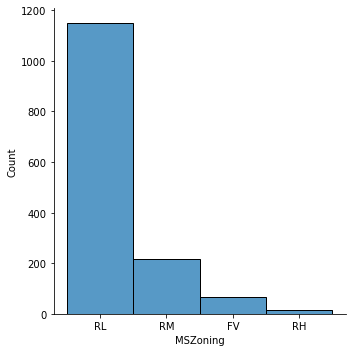

In [11]:
sns.displot(dfviz['MSZoning']);

/home/andygon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/andygon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

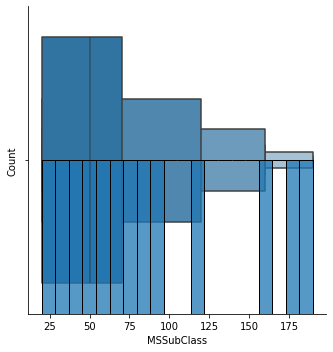

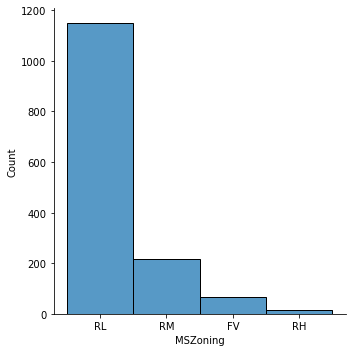

In [21]:
for i in dfviz.columns:
    sns.displot(dfviz[i])
    sns.boxenplot(dfviz[i]);

In [ ]:
sns.pairgrid(dfvix['LotFrontage', 'LotArea', 'HouseStyle', 'OverallQual', 'OverallCond', 
                   'YearBuilt', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                  ])

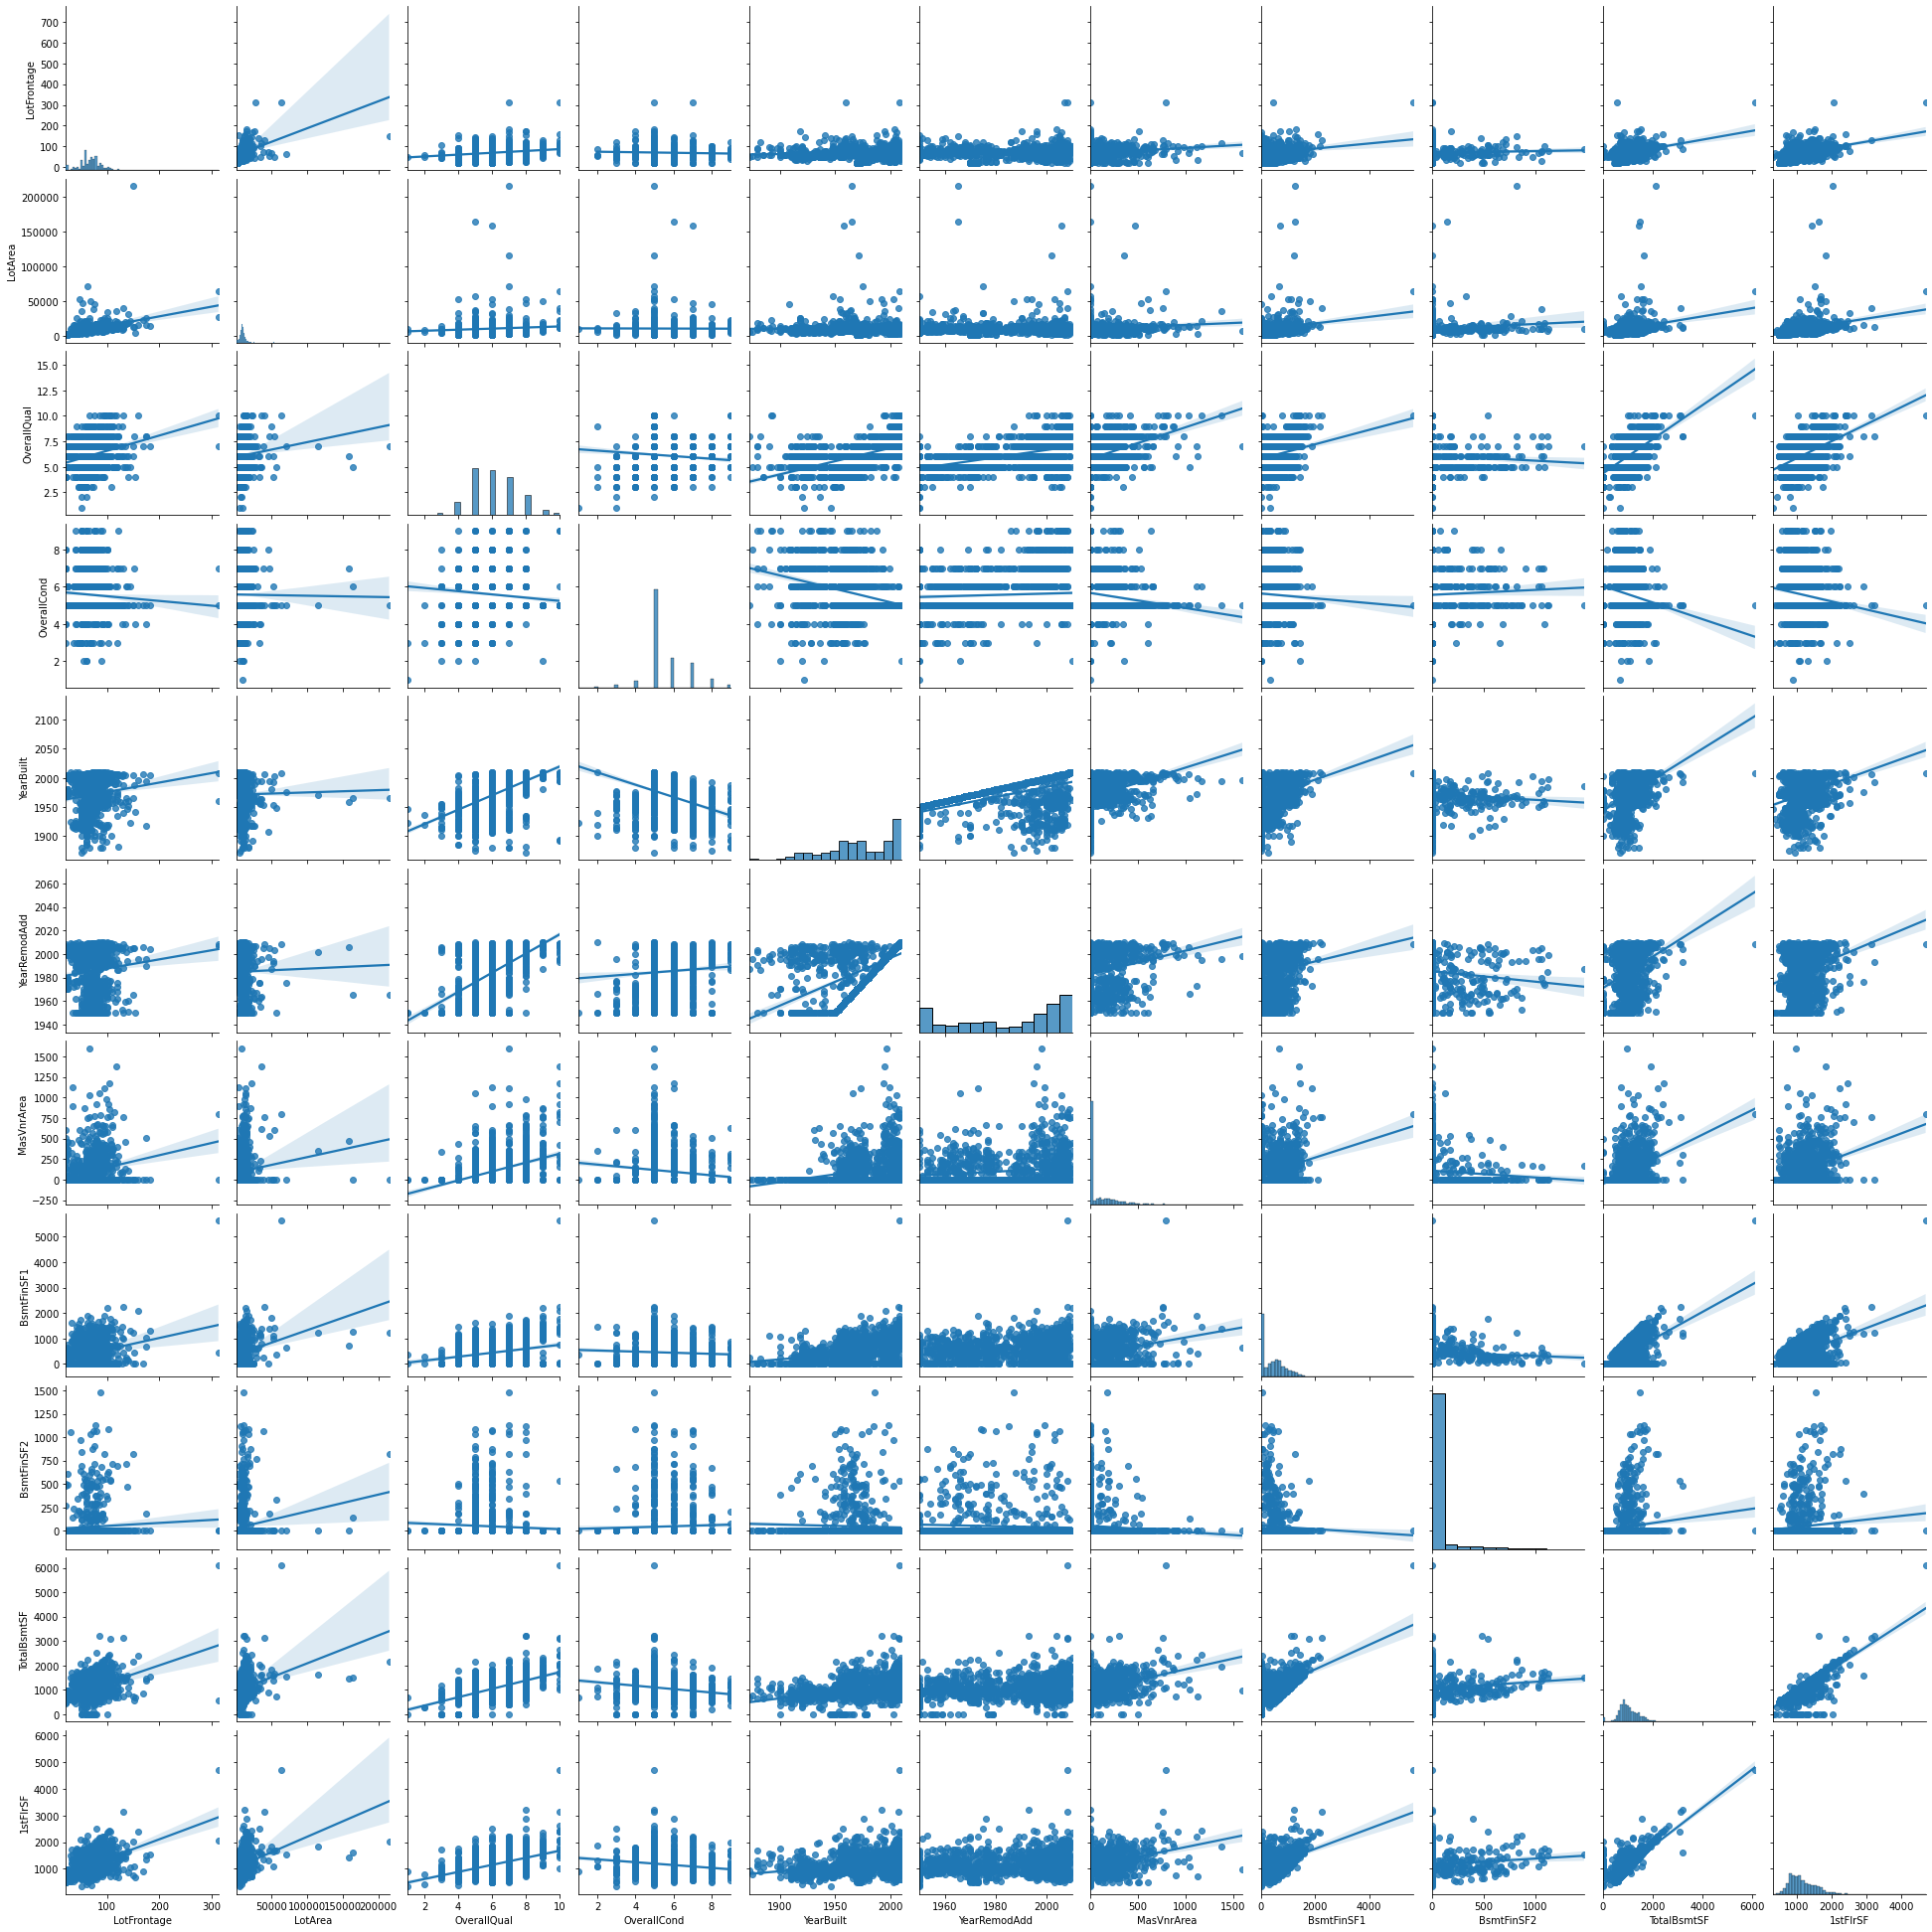

In [54]:
sns.pairplot(dfviz.iloc[:,:35], kind='reg')

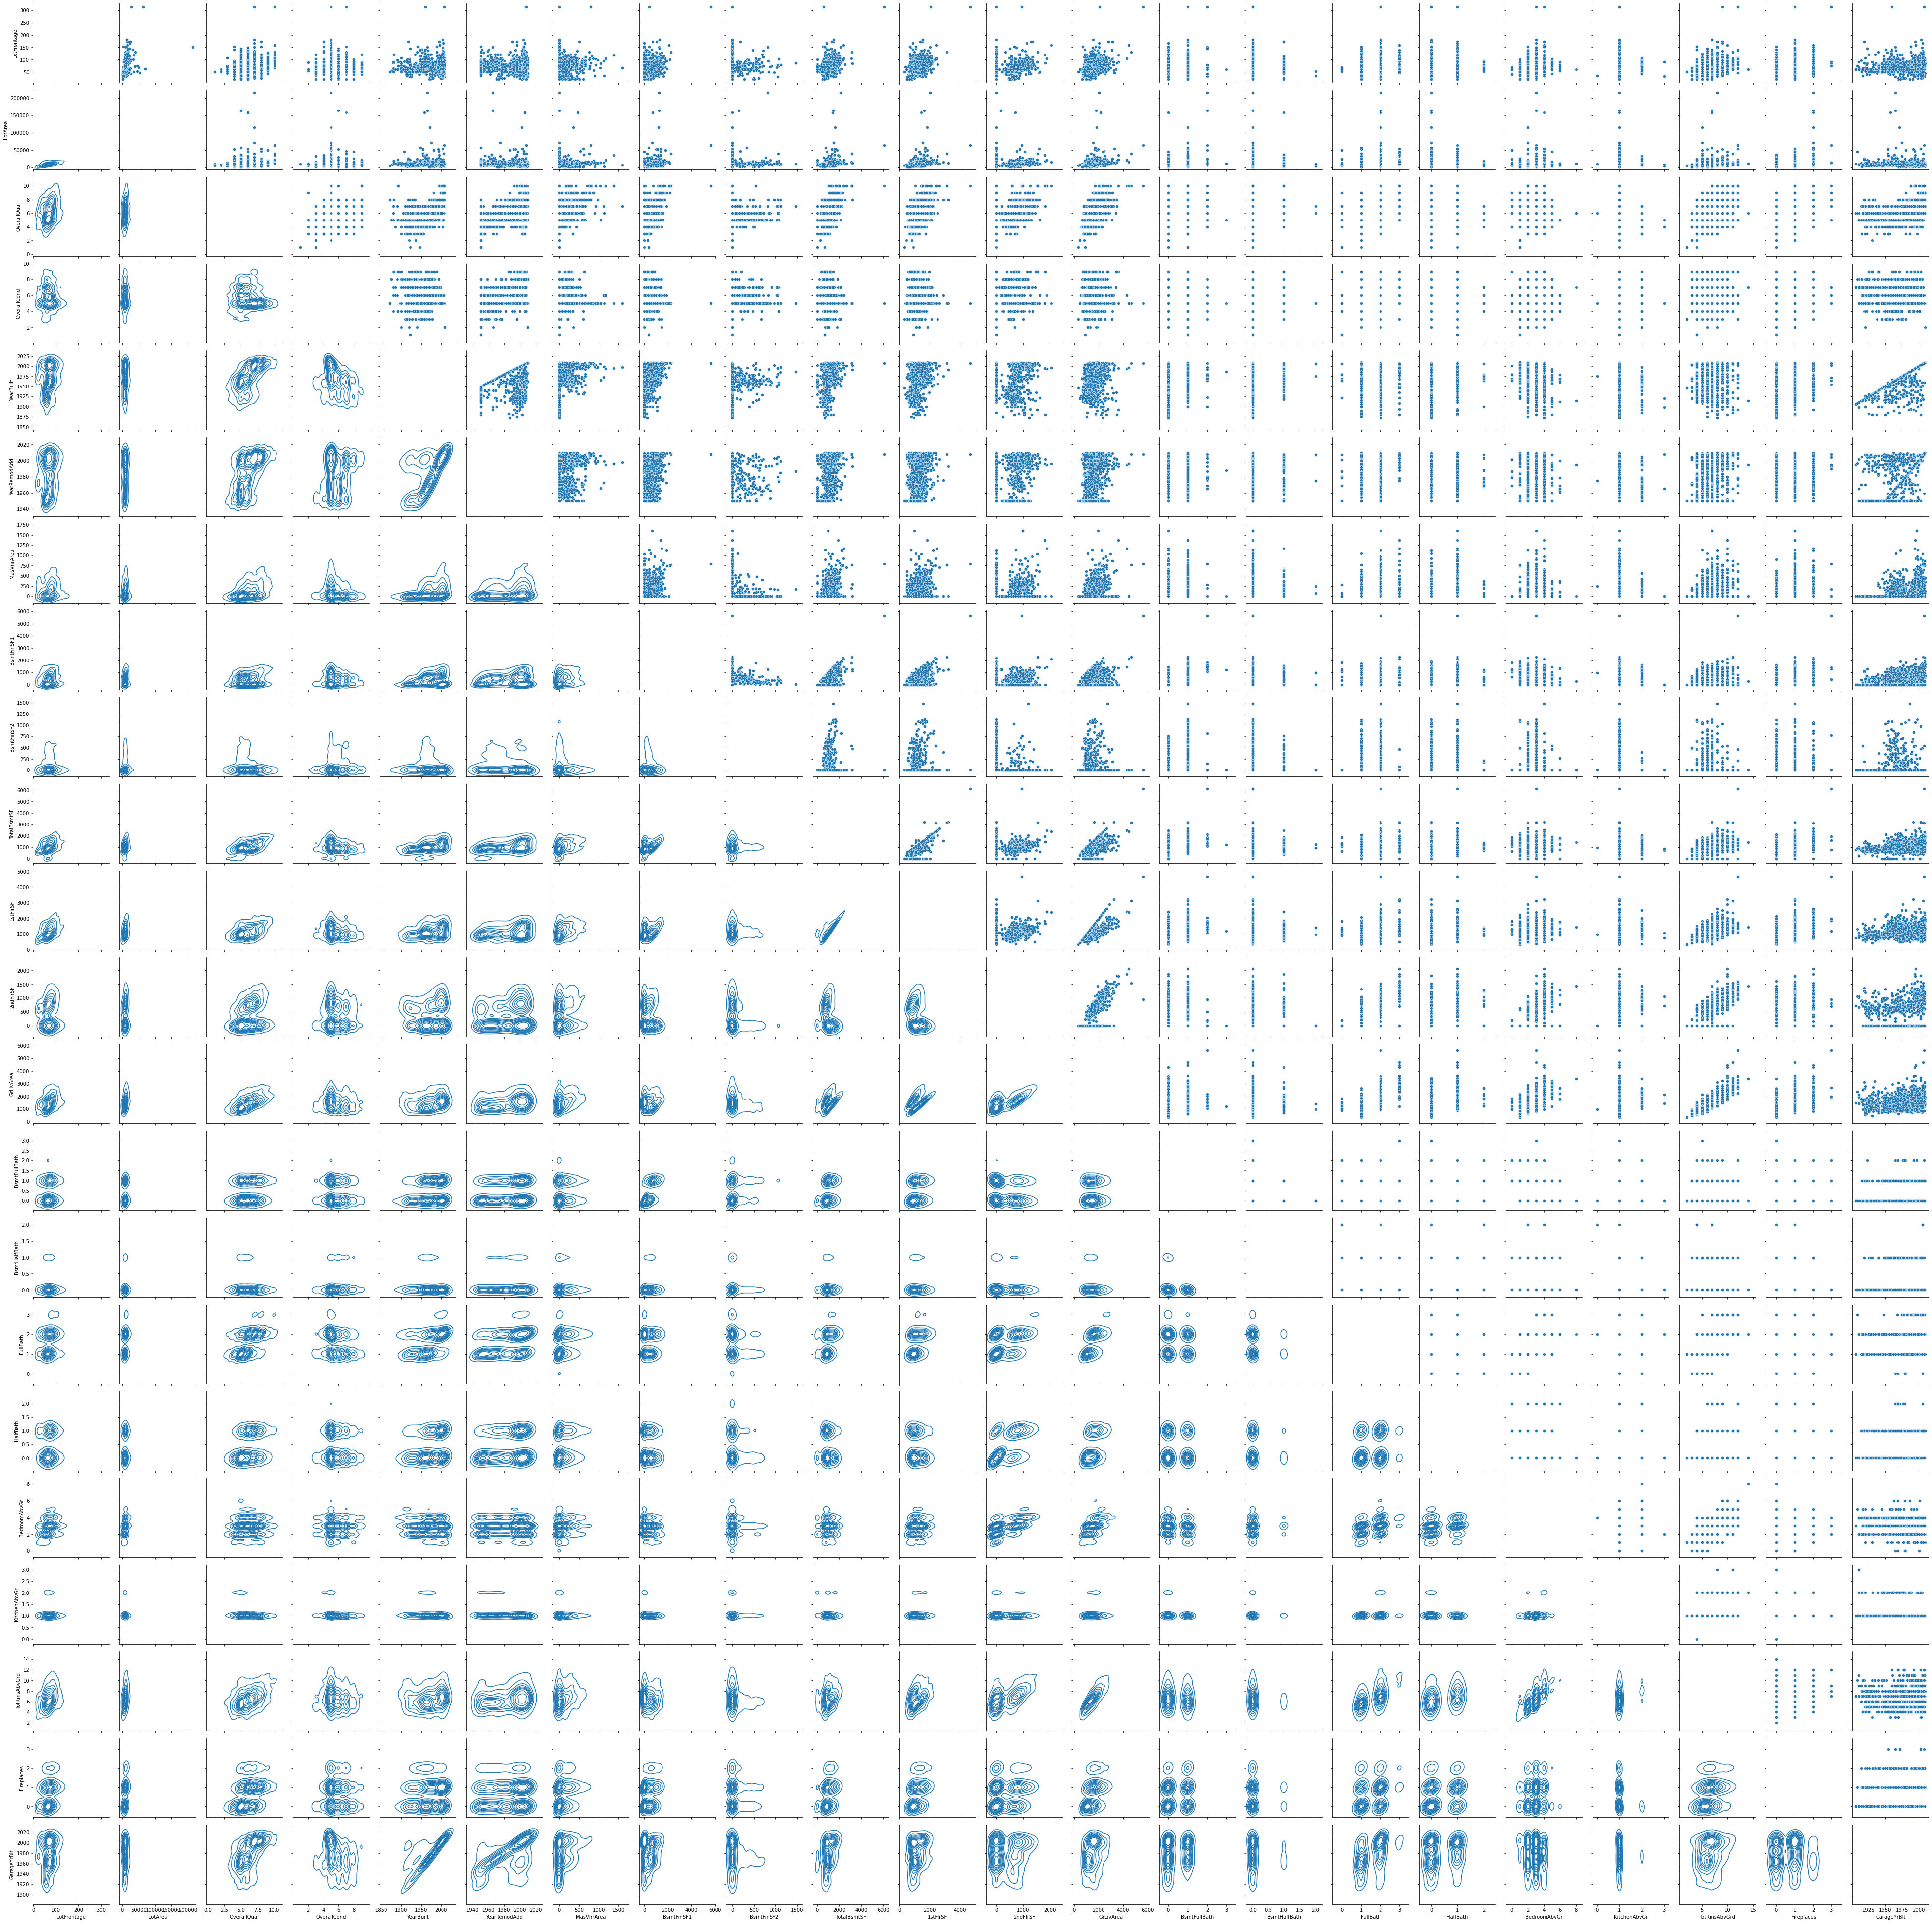

In [39]:
g = sns.PairGrid(dfviz.iloc[:,:50])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.scatterplot);

In [37]:
"""    FEATURE CREATION    """

### MSZoning ###
#Creating a feature 'residential_den' to quantitatively record high, medium and low density.
#Potential introduction of error since we are assuming a relation/preference of low density to high.
dftrain.MSZoning.replace(['RH','RM','RL', 'RP', 'FV'], [2, 1, 0, 0, 0], inplace=True)


### LotShape ###
### LandContour ###
### Neighborhood : Physical lcoations within Ames city limits ###
### Condition1 : Proximity to various conditions ###
### BldgType : Type of dwelling ###
### HouseStyle : Style of dwelling ###
### RoofStyle : Type of roof ###
    #If model needs some bias, this is a potential drop.
### Exterior1st : Exterior covering on house ###
### Exterior2nd : Exterior covering on house (if more than one material) ###
### MasVnrType : Masonry veneer type ###
### Foundation : Type of foundation ###
### MoSold : Month Sold (MM) ###
#Produce and append dummies to convert hard-to-compare entries into logistical features
LotShapedumms = pd.get_dummies(dftrain.LotShape, prefix='LotShape')
LandContourdumms = pd.get_dummies(dftrain.LandContour, prefix='LandContour')
Neighborhooddumms = pd.get_dummies(dftrain.Neighborhood, prefix='nghood')
Condition1dumms = pd.get_dummies(dftrain.Condition1, prefix='con1')
BldgTypedumms = pd.get_dummies(dftrain.BldgType, prefix='BldgType')
HouseStyledumms = pd.get_dummies(dftrain.HouseStyle, prefix='HouseStyle')
RoofStyledumms = pd.get_dummies(dftrain.RoofStyle, prefix='RfStyle')
Ext1dumms = pd.get_dummies(dftrain.Exterior1st, prefix='Ext1')
Ext2dumms = pd.get_dummies(dftrain.Exterior2nd, prefix='Ext2')
MasVnrTypedumms = pd.get_dummies(dftrain.MasVnrType, prefix='MasVnrType')
Foundationdumms = pd.get_dummies(dftrain.Foundation, prefix='Found')
MoSolddumms = pd.get_dummies(dftrain.MoSold, prefix='MoSold')


### LotConfig ###
#Combine the entries for 'Frontage on 2' and '3 sides of the property' together as there are too few FR3 and the value of the data can be preserved as a 'multi frontage' property.
dftrain.LotConfig = dftrain.LotConfig.replace('FR3', 'FR2')
LotConfigdumms = pd.get_dummies(dftrain.LotConfig, prefix='LotConfig')


### BsmtFinType1 : Rating of basement finished area ###
#Assigning NBas for No Basement, to the current np.nan's. There's no conflict since it'll be used for dummies and dropped as k - 1 control
dftrain.BsmtFinType1.replace(np.nan, 'NBas', inplace=True)
BsmtFindumms = pd.get_dummies(dftrain.BsmtFinType1, prefix='BsmtFin')


### LandSlope ###
#Encode the entries in a quantitative way, higher value = more slope. While potentially introducing error, it preserves most of its relationship
dftrain.LandSlope.replace(['Gtl','Mod','Sev'], [0, 1, 2], inplace=True)

### GarageType : Garage location ###
#Assiging categorical value to 'no garage', and turning to dummies. 
dftrain.GarageType.replace(np.nan, 'NoGar', inplace=True)
GarageTypedumms = pd.get_dummies(dftrain.GarageType, prefix='Garage')


### GarageYrBlt : Year garage was built ###
#Dropping because of the pontential error from date data and np.nans. Value from garages is recorded elsewhere
dftrain.drop('GarageYrBlt', axis=1, inplace=True)


### GarageFinish : Interior finish of the garage ###
#Assiging categorical value to 'no garage', and turning to dummies. 
dftrain.GarageFinish.replace(np.nan, 'NoGar', inplace=True)
GarageFinishdumms = pd.get_dummies(dftrain.GarageFinish, prefix='GarFin')


### YrSold : Year Sold (YYYY) ###
#Creating a feature that tracks the age of the property by subtracting the year built from year sold.
dftrain['Prop_Age'] =  dftrain.YrSold - dftrain.YearBuilt


""" CLEAN UP """                                              
        
#Dropping all the raw variables that were converted to features
dftrain.drop(['MSSubClass', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
             'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 
              'MasVnrType', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish',
              'MoSold', 'YearBuilt', 'YrSold'], axis=1, inplace=True)

#Concatenating all dummies into DataFrame
dftrain = pd.concat([dftrain, LotShapedumms, LandContourdumms, LotConfigdumms, Neighborhooddumms, 
                    Condition1dumms, BldgTypedumms, HouseStyledumms, RoofStyledumms, Ext1dumms, 
                     Ext2dumms, MasVnrTypedumms, Foundationdumms, BsmtFindumms, GarageTypedumms,
                    GarageFinishdumms, MoSolddumms], axis=1)

#Dropping one variable from every dummy created in accordance with the k - 1 principle. 
#Dropping highest response dummy, if no common sense alternative exists (i.e. one of the responses can be interpreted as a zero)
dftrain.drop(['LotShape_Reg', 'LandContour_Lvl', 'LotConfig_Inside', 'nghood_Blueste', 'con1_Norm',
              'BldgType_1Fam', 'HouseStyle_1Story', 'RfStyle_Gable', 'Ext1_VinylSd', 'Ext2_VinylSd',
             'MasVnrType_None', 'Found_PConc', 'BsmtFin_NBas', 'Garage_NoGar', 'GarFin_NoGar', 
             'MoSold_1'], axis=1, inplace=True)


In [ ]:
#Get the data ready for modeling
y = dftrain.SalePrice
X = dftrain.drop(['Id', 'SalePrice'], axis=1)

In [ ]:
y.head()

In [38]:
dftrain.tail()


Id MSZoning  LotFrontage  LotArea  LandSlope  OverallQual  \
1441  1456        0         62.0     7917          0            6   
1442  1457        0         85.0    13175          0            6   
1443  1458        0         66.0     9042          0            7   
1444  1459        0         68.0     9717          0            5   
1445  1460        0         75.0     9937          0            5   

      OverallCond  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
1441            5          2000         0.0          3          3         4   
1442            6          1988       119.0          3          3         4   
1443            9          2006         0.0          5          4         3   
1444            6          1996         0.0          3          3         3   
1445            6          1965         0.0          4          3         3   

      BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  HeatingQC  \
1441         3             1           0           0          953          5   
1442         3             1         790         163         1542          3   
1443         4             1         275           0         1152          5   
1444         3             2          49        1029         1078          4   
1445         3             1         830         290         1256          4   

      CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
1441           1         4.0       953       694       1647             0   
1442           1         4.0      2073         0       2073             1   
1443           1         4.0      1188      1152       2340             0   
1444           1         3.0      1078         0       1078             1   
1445           1         4.0      1256         0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1441             0         2         1             3             1   
1442             0         2         0             3             1   
1443             0         2         0             4             1   
1444             0         1         0             2             1   
1445             0         1         1             3             1   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
1441            3             7           0           1            3   
1442            3             7           1           2            3   
1443            4             9           0           2            4   
1444            4             5           0           0            0   
1445            3             6           0           0            0   

      GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
1441           2         460           3           3           0           40   
1442           2         500           3           3         349            0   
1443           1         252           3           3           0           60   
1444           1         240           3           3         366            0   
1445           1         276           3           3         736           68   

      EnclosedPorch  SalePrice  Prop_Age  LotShape_IR1  LotShape_IR2  \
1441              0     175000        -8             0             0   
1442              0     210000       -32             0             0   
1443              0     266500       -69             0             0   
1444            112     142125       -60             0             0   
1445              0     147500       -43             0             0   

      LotShape_IR3  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
1441             0                0                0                0   
1442             0                0                0                0   
1443             0                0                0                0   
1444             0                0                0                0   
1445             0                0